In [3]:
print("커널 정상 작동 확인")

커널 정상 작동 확인


In [4]:
# 라이브러리 임포트 및 기본 설정
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'   # Windows
plt.rcParams['axes.unicode_minus'] = False      # 마이너스 기호 깨짐 방지
plt.rcParams['figure.dpi'] = 100                # 그래프 해상도

In [ ]:
import pandas as pd

# 함수 정의
def load_weather_csv(file_path):
    start_row = None
    with open(file_path, encoding='cp949') as f:
        for i, line in enumerate(f):
            if '지점번호' in line:
                start_row = i
                break
    
    df = pd.read_csv(file_path, encoding='cp949', skiprows=start_row, engine='python')
    df.columns = df.columns.str.strip().str.replace('"', '')
    df['일시'] = pd.to_datetime(df['일시'].astype(str).str.strip(), errors='coerce')
    df = df.dropna(subset=['일시']).sort_values('일시').reset_index(drop=True)
    
    return df

# 파일 로드
weather_67 = load_weather_csv('seoul_weather_6~7.csv')
weather_45 = load_weather_csv('seoul_weather_4~5.csv')

print("\n장마철 강수량:")
print(weather_67.head())

print("\n비장마철 강수량:")
print(weather_45.head())

In [ ]:
import matplotlib.pyplot as plt
# 연도별 평균 강수량
# 연도 컬럼 생성
weather_67['연도'] = weather_67['일시'].dt.year
weather_45['연도'] = weather_45['일시'].dt.year

yearly_rain_67 = weather_67.groupby('연도')['강수량(mm)'].mean()
yearly_rain_45 = weather_45.groupby('연도')['강수량(mm)'].mean()

plt.figure(figsize=(8,4))

plt.plot(
    yearly_rain_45.index,
    yearly_rain_45.values,
    marker='o',
    label='비장마철'
)

plt.plot(
    yearly_rain_67.index,
    yearly_rain_67.values,
    marker='o',
    label='장마철'
)

plt.title("년도별 평균 강수량 변화 (장마철 vs 비장마철)")
plt.xlabel("연도")
plt.ylabel("평균 강수량 (mm)")
plt.legend()
plt.grid(alpha=0.3)

plt.show()


In [ ]:
def load_solar_csv(file_path):
    start_row = None
    with open(file_path, encoding='cp949') as f:
        for i, line in enumerate(f):
            if '지점번호' in line:
                start_row = i
                break
    
    df = pd.read_csv(file_path, encoding='cp949', skiprows=start_row, engine='python')
    df.columns = df.columns.str.strip().str.replace('"', '')
    df['일시'] = pd.to_datetime(df['일시'].astype(str).str.strip(), errors='coerce')
    df = df.dropna(subset=['일시']).sort_values('일시').reset_index(drop=True)
    
    return df

solar_67 = load_solar_csv('seoul_solar_data_6~7.csv')
solar_45 = load_solar_csv('seoul_solar_data_4~5.csv') 

print("\n장마철 일사량:")
print(solar_67.head())  

print("\n비장마철 일사량:")
print(solar_45.head())

In [ ]:
# 연도 컬럼
solar_67['연도'] = solar_67['일시'].dt.year
solar_45['연도'] = solar_45['일시'].dt.year

# 연도별 평균 일조합(hr)
yearly_sunhr_67 = solar_67.groupby('연도')['일조합(hr)'].mean()
yearly_sunhr_45 = solar_45.groupby('연도')['일조합(hr)'].mean()

import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))

plt.plot(yearly_sunhr_45.index, yearly_sunhr_45.values, marker='o', label='비장마철')
plt.plot(yearly_sunhr_67.index, yearly_sunhr_67.values, marker='o', label='장마철')

plt.title("년도별 평균 일조시간 변화 (장마철 vs 비장마철)")
plt.xlabel("연도")
plt.ylabel("평균 일조합 (hr)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


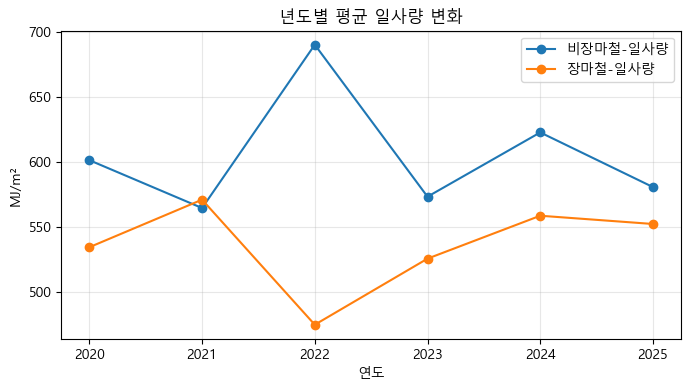

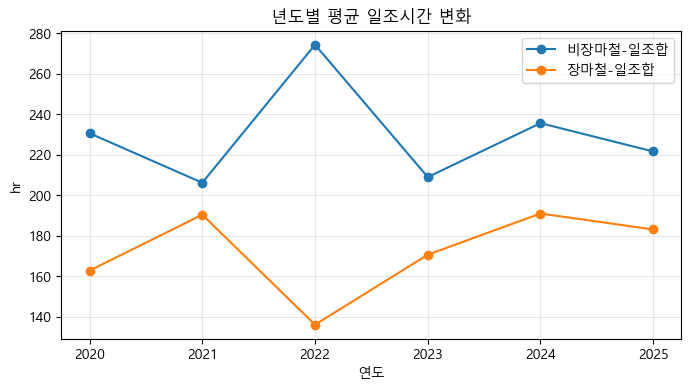

In [31]:
solar_67['연도'] = solar_67['일시'].dt.year
solar_45['연도'] = solar_45['일시'].dt.year

yearly_67 = solar_67.groupby('연도')[['일사합(MJ/m2)', '일조합(hr)']].mean()
yearly_45 = solar_45.groupby('연도')[['일사합(MJ/m2)', '일조합(hr)']].mean()

plt.figure(figsize=(8,4))
plt.plot(yearly_45.index, yearly_45['일사합(MJ/m2)'], marker='o', label='비장마철-일사량')
plt.plot(yearly_67.index, yearly_67['일사합(MJ/m2)'], marker='o', label='장마철-일사량')
plt.title("년도별 평균 일사량 변화")
plt.xlabel("연도"); plt.ylabel("MJ/m²")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

plt.figure(figsize=(8,4))
plt.plot(yearly_45.index, yearly_45['일조합(hr)'], marker='o', label='비장마철-일조합')
plt.plot(yearly_67.index, yearly_67['일조합(hr)'], marker='o', label='장마철-일조합')
plt.title("년도별 평균 일조시간 변화")
plt.xlabel("연도")
plt.ylabel("hr")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [32]:
# MJ/m² → kWh/m² 변환
# 일사량 변환: MJ/m² × 0.2778 = kWh/m²
solar_67['일사량(kWh/m²)'] = solar_67['일사합(MJ/m2)'] * 0.2778
solar_45['일사량(kWh/m²)'] = solar_45['일사합(MJ/m2)'] * 0.2778

# 발전량 계산 (패널 20m², 효율 18%, 손실 20%)
solar_67['발전량(kWh)'] = solar_67['일사량(kWh/m²)'] * 20 * 0.18 * 0.8
solar_45['발전량(kWh)'] = solar_45['일사량(kWh/m²)'] * 20 * 0.18 * 0.8

# 전체 컬럼 확인
print("장마철:")
print(solar_67)

print("\n비장마철:")
print(solar_45)

장마철:
    지점번호 지점명         일시  일조합(hr)  일조율(%)  일사합(MJ/m2)    연도  일사량(kWh/m²)  \
0    108  서울 2020-06-01    206.1   46.62      603.98  2020   167.785644   
1    108  서울 2020-07-01    119.4   26.62      464.55  2020   129.051990   
2    108  서울 2021-06-01    185.5   41.96      563.35  2021   156.498630   
3    108  서울 2021-07-01    195.2   43.51      578.30  2021   160.651740   
4    108  서울 2022-06-01    131.9   29.83      440.59  2022   122.395902   
5    108  서울 2022-07-01    140.1   31.22      508.79  2022   141.341862   
6    108  서울 2023-06-01    195.1   44.13      572.17  2023   158.948826   
7    108  서울 2023-07-01    146.1   32.55      478.80  2023   133.010640   
8    108  서울 2024-06-01    285.6   64.60      714.52  2024   198.493656   
9    108  서울 2024-07-01     96.3   21.48      402.43  2024   111.795054   
10   108  서울 2025-06-01    191.2   43.25      565.72  2025   157.157016   
11   108  서울 2025-07-01    174.9   38.99      538.53  2025   149.603634   

      발전량(kWh)  
0 

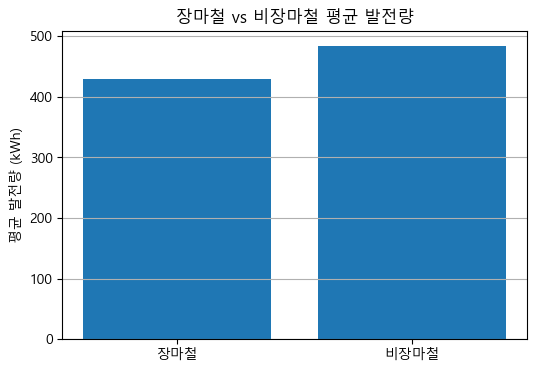

In [30]:
rain_avg = solar_67['발전량(kWh)'].mean()
dry_avg = solar_45['발전량(kWh)'].mean()

plt.figure(figsize=(6,4))
plt.bar(['장마철', '비장마철'], [rain_avg, dry_avg])

plt.title('장마철 vs 비장마철 평균 발전량')
plt.ylabel('평균 발전량 (kWh)')
plt.grid(axis='y')
plt.show()


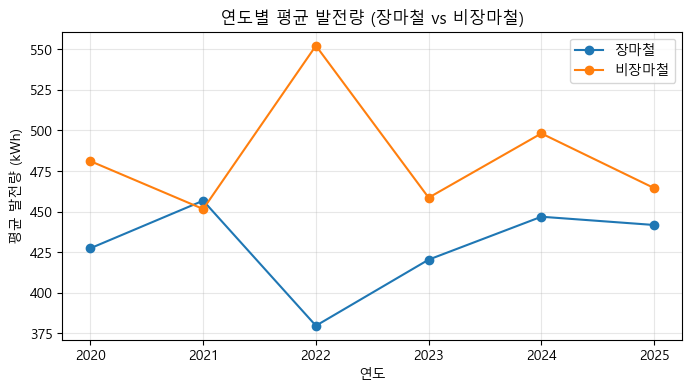

In [37]:
# 연도 컬럼
solar_67['연도'] = solar_67['일시'].dt.year
solar_45['연도'] = solar_45['일시'].dt.year
merged_67 = solar_67
merged_45 = solar_45

# 연도별 평균 발전량
yearly_gen_67 = merged_67.groupby('연도')['발전량(kWh)'].mean()
yearly_gen_45 = merged_45.groupby('연도')['발전량(kWh)'].mean()
plt.figure(figsize=(8,4))

plt.plot(
    yearly_gen_67.index,
    yearly_gen_67.values,
    marker='o',
    label='장마철'
)

plt.plot(
    yearly_gen_45.index,
    yearly_gen_45.values,
    marker='o',
    label='비장마철'
)

plt.title('연도별 평균 발전량 (장마철 vs 비장마철)')
plt.xlabel('연도')
plt.ylabel('평균 발전량 (kWh)')
plt.legend()
plt.grid(alpha=0.3)

plt.show()


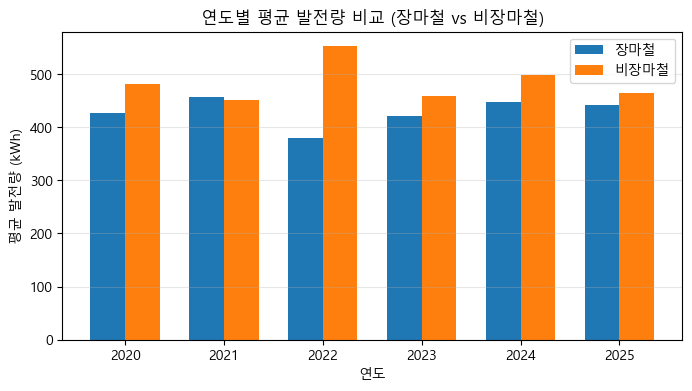

In [38]:
# 연도 컬럼 (이미 있으면 생략)
solar_67['연도'] = solar_67['일시'].dt.year
solar_45['연도'] = solar_45['일시'].dt.year

# 연도별 평균 발전량
yearly_rain = solar_67.groupby('연도')['발전량(kWh)'].mean()
yearly_dry  = solar_45.groupby('연도')['발전량(kWh)'].mean()

years = sorted(set(yearly_rain.index) & set(yearly_dry.index))
x = np.arange(len(years))
width = 0.35

plt.figure(figsize=(8,4))

plt.bar(x - width/2, yearly_rain.loc[years], width, label='장마철')
plt.bar(x + width/2, yearly_dry.loc[years],  width, label='비장마철')

plt.xticks(x, years)
plt.title('연도별 평균 발전량 비교 (장마철 vs 비장마철)')
plt.xlabel('연도')
plt.ylabel('평균 발전량 (kWh)')
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.show()


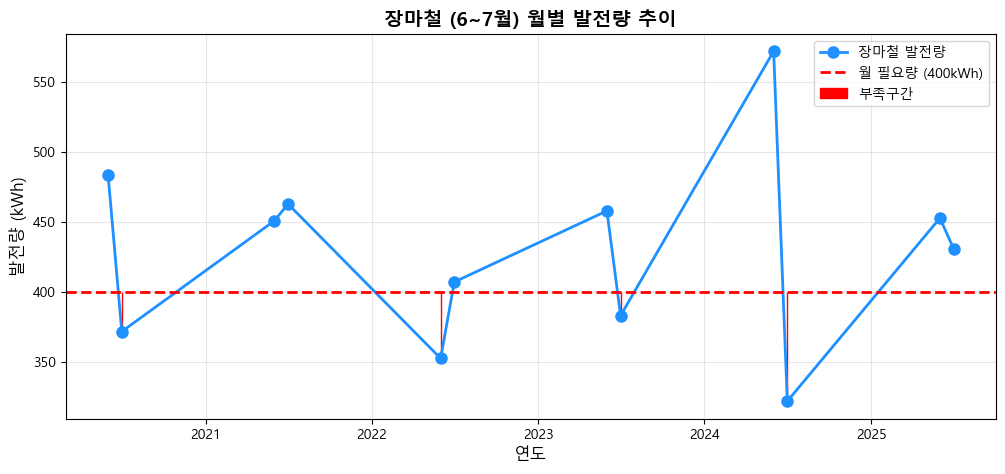

In [ ]:
plt.figure(figsize=(12, 5))
# 선 그래프 그리기
# - x축: 날짜 (merged_67['일시'])
# - y축: 발전량 (merged_67['발전량(kWh)'])
# - marker='o': 점 표시 (동그라미)
# - linewidth=2: 선 굵기
# - markersize=8: 점 크기
plt.plot(merged_67['일시'], merged_67['발전량(kWh)'],
         marker='o', linewidth=2, markersize=8,
         color='dodgerblue', label='장마철 발전량')
# 수평선 그리기 (월 필요량 400kWh를 빨간 점선으로)
# axhline(): 축을 따라 수평선을 표시
# -y=400: y축 400 위치에 선 그리기
# -linestyle='--': 점선
plt.axhline(y=400, color='red', linestyle='--', linewidth=2, label='월 필요량 (400kWh)' )
# 부족한 구간 색칠하기
# fill_between(): 두 수평 방향의 곡선 사이 채우기
# - 400과 실제 발전량 사이를 빨간색으로 채우기
# - where 조건: 발전량이 400보다 작을 때만 색칠
plt.fill_between(merged_67['일시'], 400, merged_67['발전량(kWh)'],
                 where=(merged_67['발전량(kWh)'] < 400),
                 color='red', label = '부족구간')
# 그래프 꾸미기
plt.title('장마철 (6~7월) 월별 발전량 추이', fontsize=14, fontweight='bold')
plt.xlabel('연도', fontsize=12)
plt.ylabel('발전량 (kWh)', fontsize=12)
plt.legend(loc='upper right') # 범례 (우측 상단)
plt.grid(True, alpha=0.3) # 격자 (투명도 30%)
plt.show()

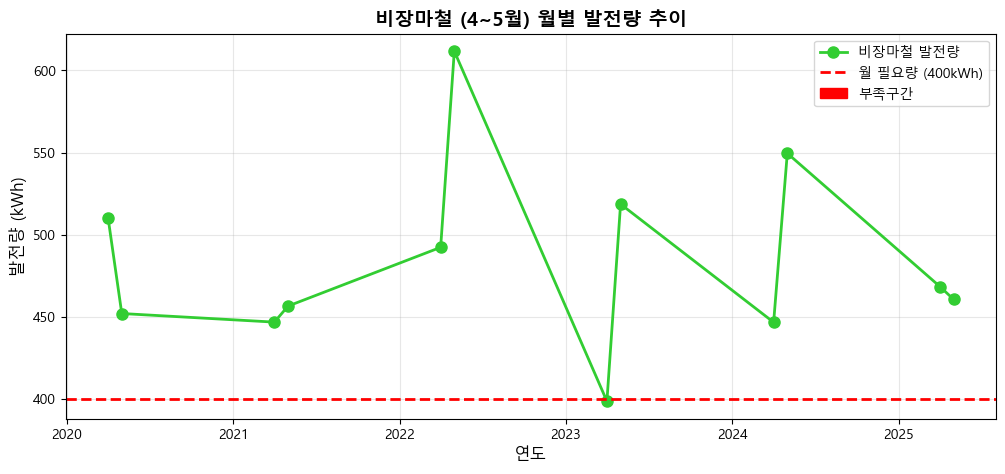

In [40]:
plt.figure(figsize=(12, 5))
plt.plot(merged_45['일시'], merged_45['발전량(kWh)'],
        marker='o',
        linewidth=2, markersize=8,
        color='limegreen', label='비장마철 발전량')
plt.axhline(y=400, color='red', linestyle='--', linewidth=2, label='월 필요량 (400kWh)')
plt.fill_between(merged_45['일시'], 400, merged_45['발전량(kWh)'],
                 where=(merged_45['발전량(kWh)'] < 400),
                 color='red', label = '부족구간')
plt.title('비장마철 (4~5월) 월별 발전량 추이', fontsize=14, fontweight='bold')
plt.xlabel('연도', fontsize=12)
plt.ylabel('발전량 (kWh)', fontsize=12)
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)
plt.show()


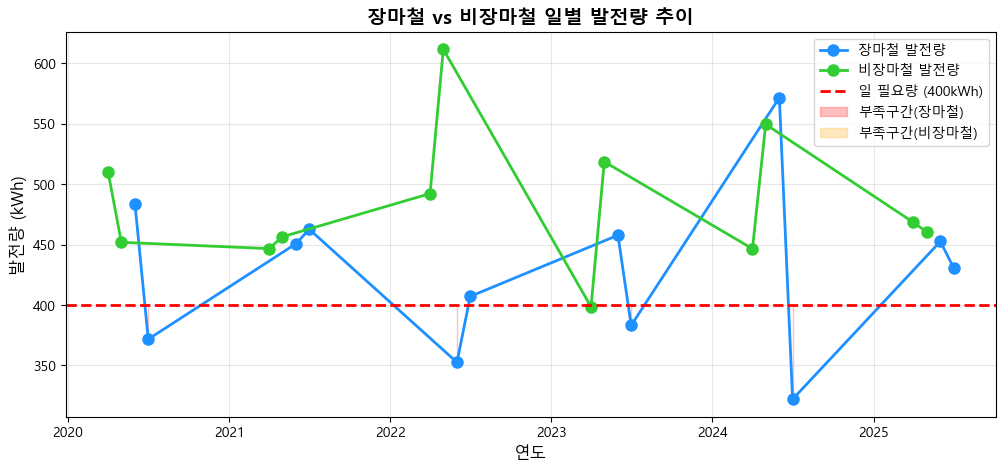

In [41]:
plt.figure(figsize=(12, 5))

# 🔹 장마철 발전량
plt.plot(
    merged_67['일시'],
    merged_67['발전량(kWh)'],
    marker='o',
    linewidth=2,
    markersize=8,
    color='dodgerblue',
    label='장마철 발전량'
)

# 🔹 비장마철 발전량
plt.plot(
    merged_45['일시'],
    merged_45['발전량(kWh)'],
    marker='o',
    linewidth=2,
    markersize=8,
    color='limegreen',
    label='비장마철 발전량'
)

# 🔸 기준선 (일 필요량)
plt.axhline(
    y=400,
    color='red',
    linestyle='--',
    linewidth=2,
    label='일 필요량 (400kWh)'
)

# 🔸 부족 구간 표시 (장마철)
plt.fill_between(
    merged_67['일시'],
    400,
    merged_67['발전량(kWh)'],
    where=(merged_67['발전량(kWh)'] < 400),
    color='red',
    alpha=0.25,
    label='부족구간(장마철)'
)

# 🔸 부족 구간 표시 (비장마철)
plt.fill_between(
    merged_45['일시'],
    400,
    merged_45['발전량(kWh)'],
    where=(merged_45['발전량(kWh)'] < 400),
    color='orange',
    alpha=0.25,
    label='부족구간(비장마철)'
)

# 🧾 그래프 꾸미기
plt.title('장마철 vs 비장마철 일별 발전량 추이', fontsize=14, fontweight='bold')
plt.xlabel('연도', fontsize=12)
plt.ylabel('발전량 (kWh)', fontsize=12)
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)

plt.show()
